# <font color='red'>Examen Data Science</font>

![title](https://github.com/martinezbrenda/Test_Ingreso_Santander/blob/main/img/st.jpeg?raw=1)

Escribir su Nombre y Apellido a continuación

Nombre:
Apellido:

# Sección A - Desafíos Técnicos

## <font color='red'>1 -Python</font>

### py-1) Vectores, Clases y Objetos

Desarrollar una clase en python que, al instanciar, reciba un vector **weights** y que tenga la siguiente funcionalidad:


* Desarrollar el método **set_weights** que pueda sobrescribir los valores del atributo `weights`
* Desarrollar el método **dot** que permita multiplicar el vector `weigths` por un vector de entrada. (producto escalar)
* Desarrollar el método **predict** que utilice la salida del método dot y lo pasé por la función ReLu. <a href=https://es.wikipedia.org/wiki/Rectificador_(redes_neuronales)>Función Relu</a>  
* Desarrollar otra clase que herede el comportamiento de la clase anterior y que además:
  * Reciba un parametro adicional: `bias` (int64)
  * Redefina el método **dot** y al producto le sume el atributo `bias`

In [ ]:
import numpy as np
weights = np.array([-4,3,1,-2])

In [ ]:
# Escriba aquí su respuesta

### py-2) Unit test

Desarrollar un test unitario que permita evaluar los métodos de la clase base.

In [ ]:
# Escriba aquí su respuesta

## <font color='red'>2- SQL</font>

Para el siguiente ejercicio se tiene una base de datos que tiene el siguiente DER:

![title](https://github.com/martinezbrenda/Test_Ingreso_Santander/blob/main/img/img_der.png?raw=1)


* Persona (id) puede tener muchas Tarjetas (se relaciona a través de `id_titular`)
* Una Compra siempre es realizada con una única tarjeta
* (EXTRA) La tabla Compra posee un histórico de más de 10 años y varias decenas de millones de registros por lo que las consultas a esta entidad pueden tardar varios minutos si no están correctamente optimizadas.

### sql-1) Query

Obtener los número de tarjeta que no tengan consumos en el último mes pero que pertenecen a personas que hayan comprado al menos un total de $5000 en el último mes en los rubros (FARMACIA y SUPERMERCADOS) en conjunto. (Si es posible, tener en cuenta el punto EXTRA mencionado previamente).


In [ ]:
# Escriba aquí su respuesta

### sql-2) Explicar el resultado de la siguiente query

* ¿Qué se obtiene cómo resultado?
* ¿Quiénes son P1, P2 y P3?
* (EXTRA) Si supiera que la tabla persona se carga completa todos los días del año, cada día teniendo una foto guardada con una valor distinto dentro de una variable llamada partition_date. Por ej: uno puede consultar todos los ids de la fecha 2021-05-27 o de la fecha que quiera. ¿Cambiaría algo la siguiente query si quisiera obtener el mismo resultado para la última fecha disponible?


 <font color='blue'>**SELECT**</font> P1.dni,  <font color='red'>COUNT</font> ( <font color='red'>DISTINCT</font>  ( P2.id ) )\
<font color='blue'>**FROM** </font> Persona P1 \
<font color='blue'>**JOIN**</font> Persona P2 on P1.id_padre = P2.id \
<font color='blue'>**JOIN**</font>  Persona P3 on P2.id_padre = P3.id \
<font color='blue'>**WHERE**</font>  P3.sexo = 'MASCULINO' \
<font color='blue'>**GROUP BY**</font>  P1.dni

In [ ]:
# Escriba aquí su respuesta

# Sección B - Desafío Machine Learning

#### Enunciado Parte Práctica

El ejercicio consiste en realizar una clasificación de intención de compra online. Para ello se dispondrá de un dataset **online_shoppers_intention.csv** el cual consta de **12.330** registros y **18** columnas
* El target es la columnna **Revenue**

Para completar el desafío se deberá:
* Realizar un análisis exploratorio de los datos
* Explicar la elección del algoritmo utilizado
* Explicar los resultados obtenidos (Métricas)
* Explicar cuales son las variables que más afectan a la predicción.
* Contestar las siguientes preguntas:
  * *¿El modelo final elegido es bueno? Justificar*
  * *¿Existe overfitting o underfitting?*

⚠️**ACLARACIONES:**⚠️

- Se tendrá en cuenta la prolijidad del informe.
- Se tendrá en cuenta la legibilidad del código.
- De ser necesario, dejar asentado los supuestos utilizados por escrito.

## Analisis exploratorio de datos


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

### Primer aproach a los datos

In [252]:
## Lectura del data set y muestreo

df = pd.read_csv("https://raw.githubusercontent.com/martinezbrenda/Test_Ingreso_Santander/main/online_shoppers_intention.csv")
# Inspección rápida de las primeras filas, columnas y tamano
print("Total filas:", df.shape[0])
print("Total columnas:", df.shape[1])
df.head(6)

Total filas: 12330
Total columnas: 18


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False


In [253]:
# Estructura del DataFrame para ver tipos y cantidades

print("\nEstructura:")
print(df.info())

print("\nResumen estadistico")
print(df.describe())


Estructura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficTy

Podemos observar que tenemos 4 tipos de variables que se reparten en 7 int 7 float 2 object y 2 bool.

,proportion
Revenue,
False,0.845255
True,0.154745


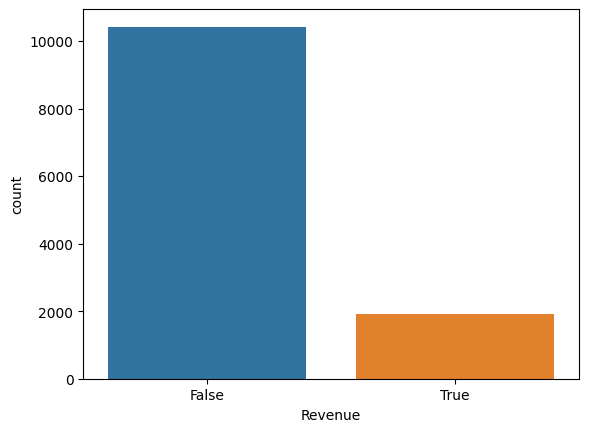

In [254]:
# Distribucion de la variable target

sns.countplot(x='Revenue', data=df, hue='Revenue', legend=False)
df['Revenue'].value_counts(normalize=True)

Se puede ver que el data set esta altamente desbalanceado, tendremos que analizar que metricas conviene utilizar para la evaluacion del modelo y conciderar un posible rebalanceo

### Tranformacion de variables
Luego de las observaciones realizadas anteriormente vamos a analizar como modificar ciertas columnas para estas puedan ser utilizadas. Estas son:


*   Weekend
*   VisitorType
*   Month
* Revenue




In [255]:
print(df['VisitorType'].unique())
df.VisitorType.value_counts()

['Returning_Visitor' 'New_Visitor' 'Other']


,count
VisitorType,
Returning_Visitor,10551
New_Visitor,1694
Other,85


Podemos observar que visitor type no es una variable binaria, pero debido a que la categoria "Other" tiene muy pocos registros, la eliminaremos y concideraremos unicamente si el visitante es nuevo o recurrente.

In [256]:
df['VisitorType'] = df['VisitorType'].apply( lambda x: x if x in ['Returning_Visitor', 'New_Visitor'] else 'New_Visitor')
df['VisitorType'] = df['VisitorType'].apply(lambda x: 0 if x == 'Returning_Visitor' else 1)
print(df['VisitorType'].unique())
df.VisitorType.value_counts()

[0 1]


,count
VisitorType,
0,10551
1,1779


Convertimos a las columnas Weekend y Revenue en int

In [257]:
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

Ahora modificaremos la columna Month para que deje de ser del tipo string.

In [258]:
print(df['Month'].unique()) # Tenemos que ver como este data set tiene los meses escritos porque si no el mapeo no va a funcionar y va a dejar la columna Month con valores en nulo
month_map = {
    'Feb': 2, 'Mar': 3, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10,
    'Nov': 11, 'Dec': 12
}
df['Month'] = df['Month'].map(month_map)

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [259]:
df.TrafficType.value_counts()

,count
TrafficType,
2,3913
1,2451
3,2052
4,1069
13,738
10,450
6,444
8,343
5,260


Podemos observar que tenemos demasiados tipos de trafico y muchos de ellos ni quiera tienen una cantidad significativa de registros asociados. Ahora procederemos a buscar los 10 mas frecuentes (ya que son 10 las categorias que superan los 200 registros) y reemplazar a todos los que no pertenezcan a ese top por la categoria "Other"

In [260]:
top10= df.TrafficType.value_counts().index[:10]
df['TrafficType']= np.where(df['TrafficType'].isin(top10), df['TrafficType'], 0)
df.TrafficType.value_counts()

,count
TrafficType,
2,3913
1,2451
3,2052
4,1069
13,738
10,450
6,444
0,363
8,343


In [261]:
df.Browser.value_counts()

,count
Browser,
2,7961
1,2462
4,736
5,467
6,174
10,163
8,135
3,105
13,61


De la misma manera que en el caso anterior, vamos a realizar lo mismo con la variable Browser

In [262]:
top5 = df['Browser'].value_counts().index[:5]
df['Browser'] = np.where(df['Browser'].isin(top5), df['Browser'], 0)
df.Browser.value_counts()

,count
Browser,
2,7961
1,2462
4,736
0,530
5,467
6,174


In [263]:
df.OperatingSystems.value_counts()

,count
OperatingSystems,
2,6601
1,2585
3,2555
4,478
8,79
6,19
7,7
5,6


In [264]:
top3 = df['OperatingSystems'].value_counts().index[:3]
df['OperatingSystems'] = np.where(df['OperatingSystems'].isin(top3), df['OperatingSystems'], 0)
df.OperatingSystems.value_counts()

,count
OperatingSystems,
2,6601
1,2585
3,2555
0,589


Al contabilizar el contenido del resto de las columnas no concideramos necesario realizar modificaciones en este momento ahora verificaremos las modifcaciones realizadas

In [265]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,0,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,0,1,4,0,1,0


### Busca de valores faltantes o atipicos
Analizaremos el data set en busca de nulos y outliers

In [266]:
# Valores nulos
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


Observarmos que no se presentan valores nulos lo cual a priori puede parecer extrano pero una vez avanzado el EDA comprendemos que por la naturaleza del problema podria ser veridico

Analizamos las distribuciones de las variables

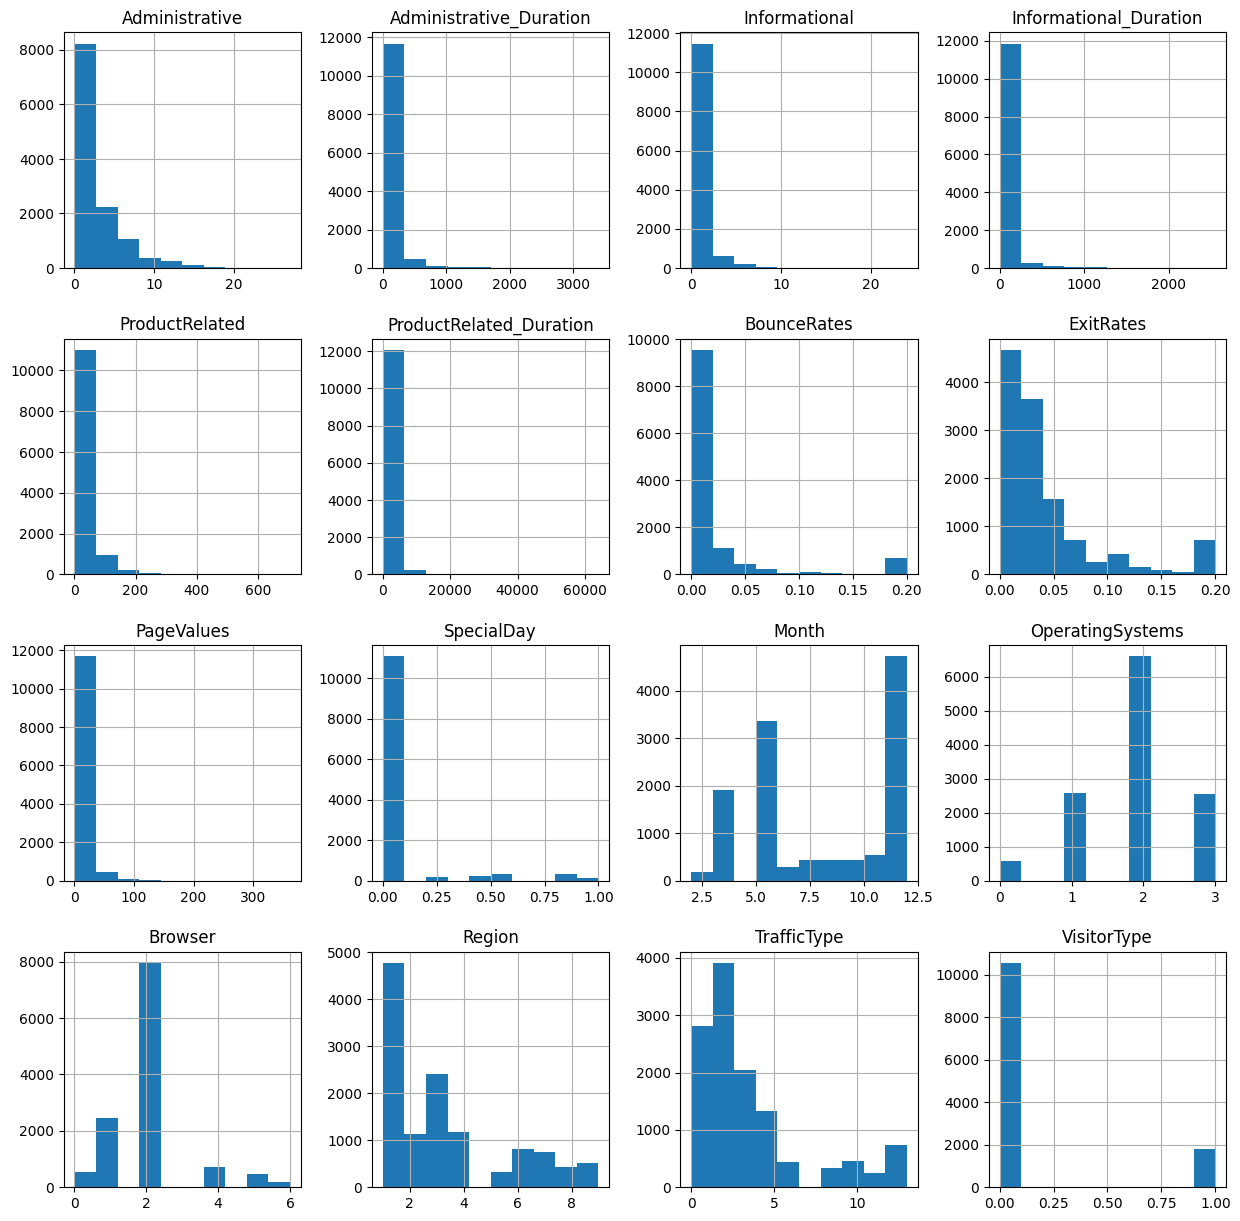

In [267]:
df.iloc[:,:-2].hist(figsize=(15,15));

Podemos ver que se presentan outliers, procedemos a identificarlos

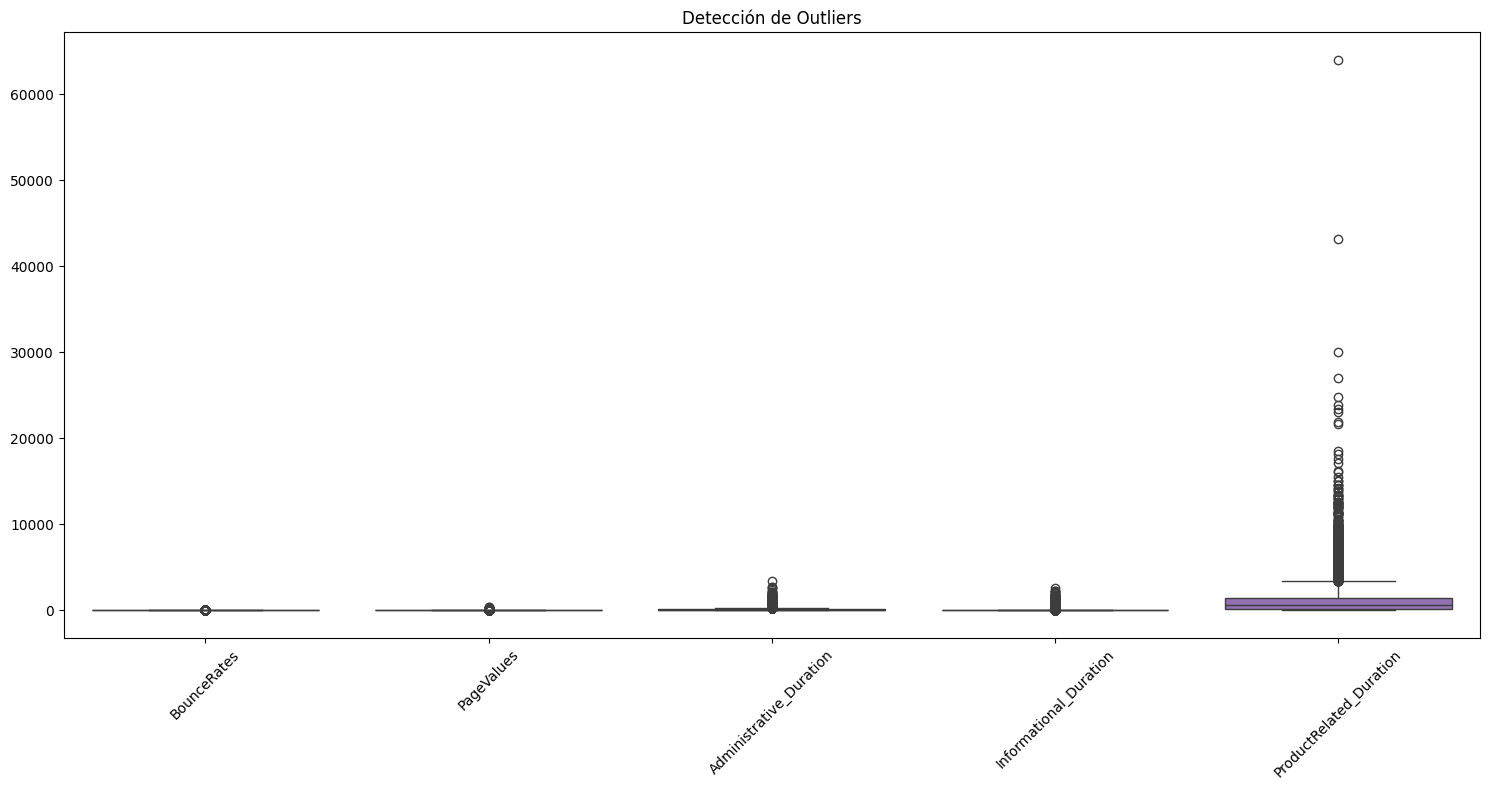

In [268]:
cols_outliers = ['BounceRates', 'PageValues', 'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[cols_outliers])
plt.title('Detección de Outliers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [269]:
outlier_summary = {}

for col in df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_summary[col] = outliers

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Cantidad de outliers'])
outlier_df

,Cantidad de outliers
Administrative,404
Administrative_Duration,1172
Informational,2631
Informational_Duration,2405
ProductRelated,987
ProductRelated_Duration,961
BounceRates,1551
ExitRates,1099
PageValues,2730
SpecialDay,1251


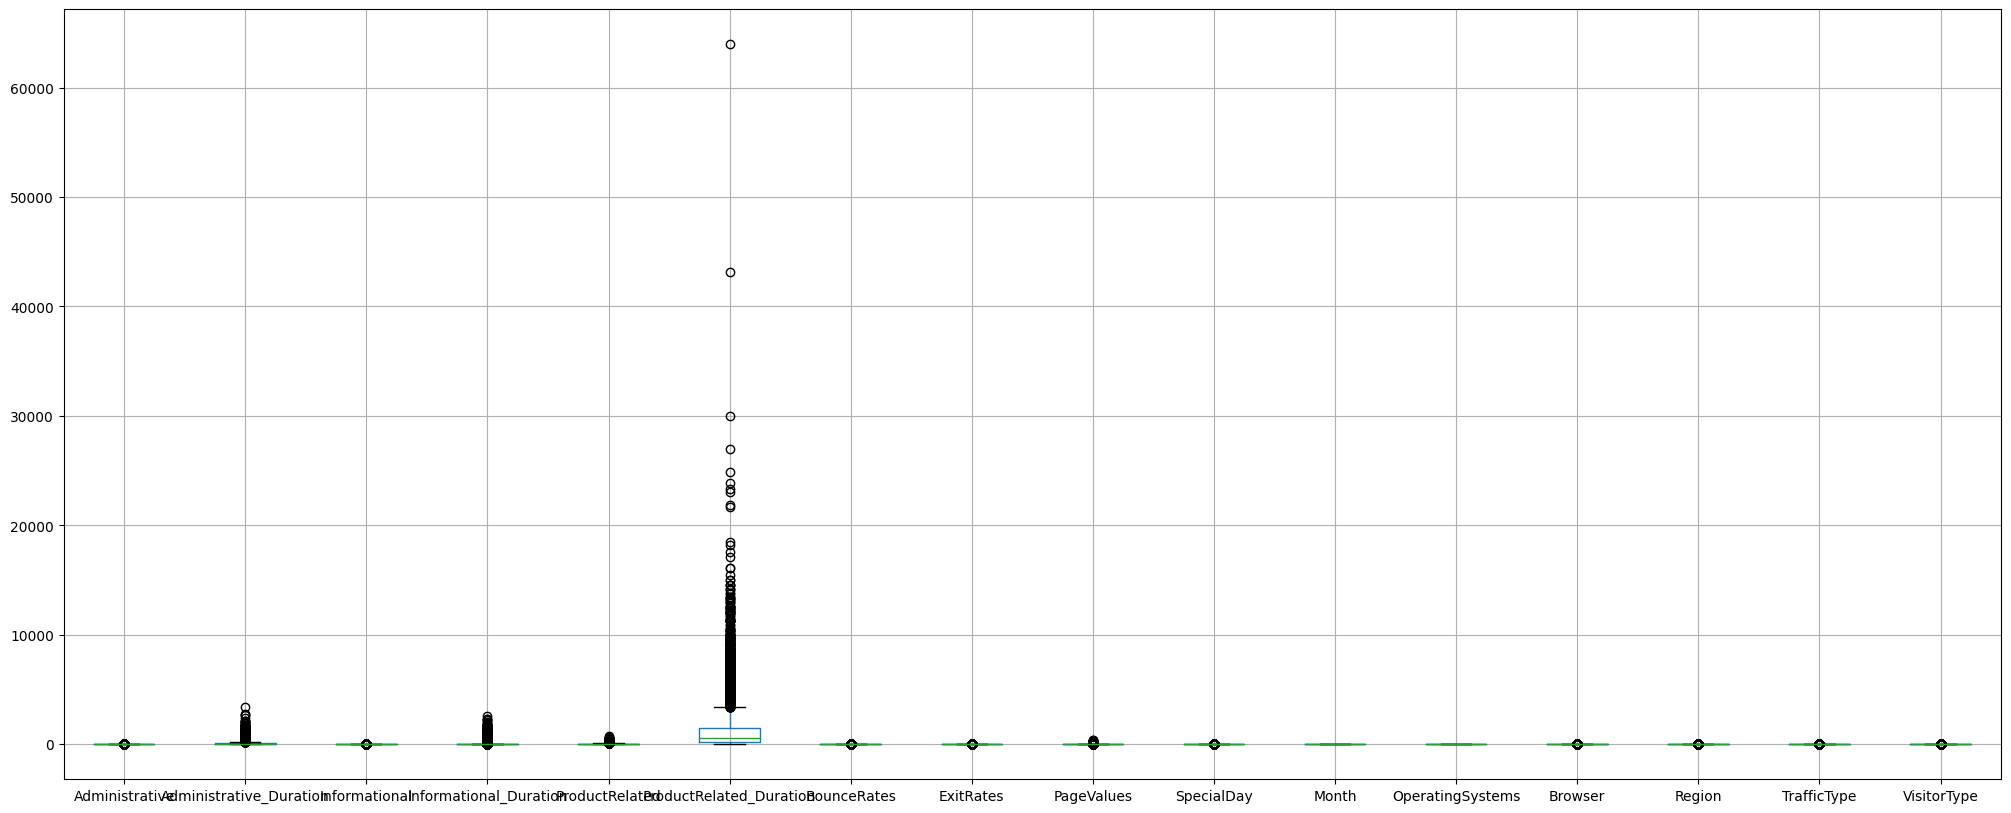

In [270]:
df.iloc[:,:-2].boxplot(figsize=(25,10));

Segun lo que observamos
* PageValues: Fuerte asimetría, lo que puede ser común porque tiene muchos ceros (personas que ni llegan al checkout del carrito de compras) y algunos valores muy altos (que reflejan un interes en la compra). No conviene eliminar estos outliers, ya que son datos relevantes.

* BounceRates y ExitRates: Hay algunos valores extremos, pero estos porcentajes extremos son relevantes para el comportamiento del usuario y nos arriesgamos a perder ejemplos significativos.

* SpecialDay: Esta columna ya está muy dispersa por diseño (días especiales codificados en 0-1).

* VisitorType, Weekend, Revenue: Marcados como outliers por IQR por ser binarios pero no deben ser modificadas

Decidimos conservar los outliers para:
* Preservar el comportamiento real
* No incrementar el desbalance de la variable target.
* Evitar perdida de informacion


### Corelacion entre variables
Luego de las observaciones realizadas anteriormente vamos a analizar si contamos con columnas que pueden ser eliminadas o modificadas para ser de mayor provecho. Estas son:


*   OperatingSystems
*   Browser
*   Region
*   TrafficType
*   Informational vs Informational_Duration
*   ProductRelated vs ProductRelated_Duration
*   Administrative vs Administrative_Duration
*   VisitorType
*   Month


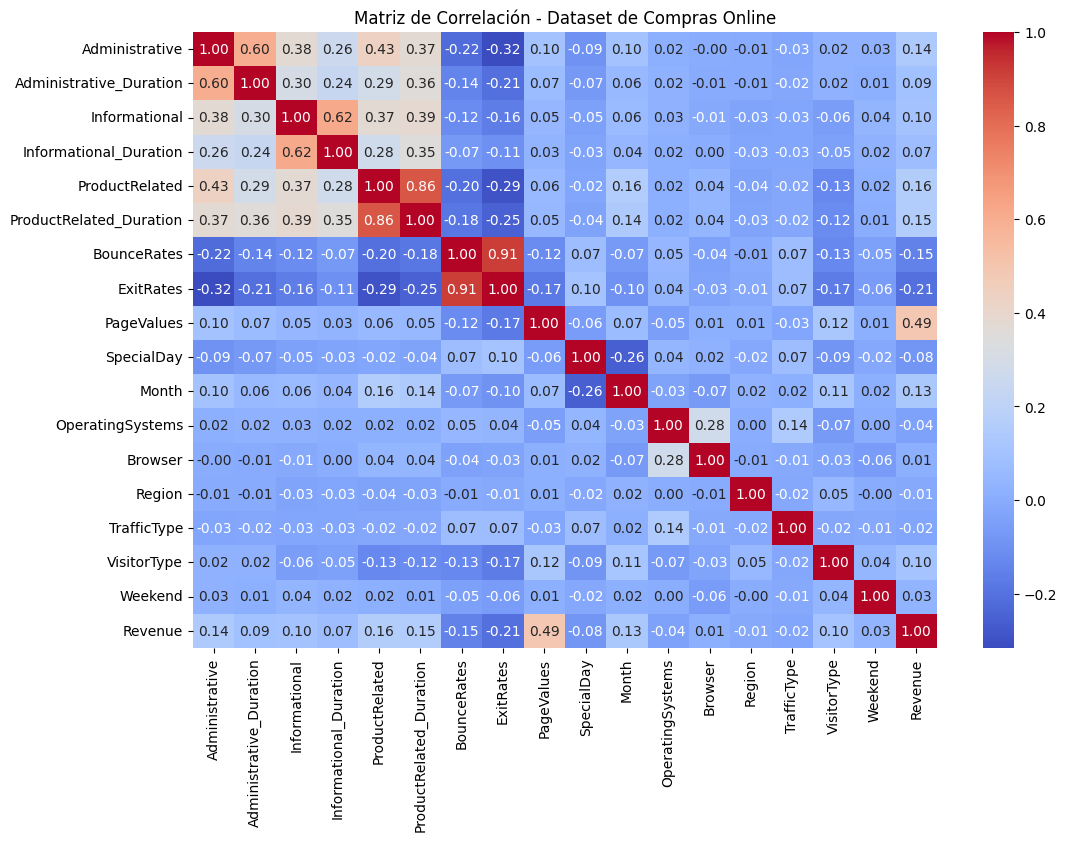

In [271]:
# analizamos que varibles son realmente utiles
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Dataset de Compras Online")
plt.show()

In [247]:
corr_with_target = df.corr()['Revenue'].sort_values(ascending=False)
print("Correlación con la variable Revenue:")
print(corr_with_target.to_frame())

Correlación con la variable Revenue:
                          Revenue
Revenue                  1.000000
PageValues               0.492569
ProductRelated           0.158538
ProductRelated_Duration  0.152373
Administrative           0.138917
Month                    0.127372
VisitorType              0.103843
Informational            0.095200
Administrative_Duration  0.093587
Informational_Duration   0.070345
Weekend                  0.029295
Browser                  0.011932
Region                  -0.011595
TrafficType             -0.023640
OperatingSystems        -0.039447
SpecialDay              -0.082305
BounceRates             -0.150673
ExitRates               -0.207071


Con la informacion que el heatmap nos presenta podemos justificar la eliminacion de ciertas columnas.
Como por ejemplo:
* Administrative ya que contiene informacion menos valiosa que Administrative_Duration. De manera que si administrative esta en cero sabemos que adminsitrative_duration tambien lo va a estar y en caso de que no sean cero, la informacion que vamos a usar va a estar en duration no en administrative. Lo mismo para Informational y para product related
* Columnas como OperatingSystems, Browser, Region, SpecialDay y TrafficType tienen muy baja correlación y no aportan informacion directa #####################Chequear con random Forest igual
* Bounce rates con Exit Rates

In [272]:
#analisis con random forest y regresion logistica sobre si es contraproducente o no eliminar esas columnas
sets = {
    "set_a": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'ExitRates']),
    "set_b": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'Region', 'TrafficType']),
    "set_c": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'Browser', 'TrafficType']),
    "set_d": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'Browser', 'TrafficType', 'Region', 'ExitRates']),
    "set_e": df.drop(columns=['Administrative', 'Informational', 'ProductRelated', 'Browser', 'TrafficType', 'Region', 'ExitRates', 'OperatingSystems'])
}

results = {}

In [273]:
for name, dataset in sets.items():
    X = dataset.drop(columns='Revenue')
    y = dataset['Revenue']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

    #  Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    y_proba_rf = rf.predict_proba(X_test)[:, 1]
    rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
    rf_auc = roc_auc_score(y_test, y_proba_rf)

    #  Logistic Regression (con escalado porque si no no convergia)
    pipeline_lr = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=1000))
    ])

    pipeline_lr.fit(X_train, y_train)
    y_pred_lr = pipeline_lr.predict(X_test)
    y_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]
    lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
    lr_auc = roc_auc_score(y_test, y_proba_lr)

    results[name] = {
        "Random Forest": {
            "precision": rf_report["1"]["precision"],
            "recall": rf_report["1"]["recall"],
            "f1-score": rf_report["1"]["f1-score"],
            "roc_auc": rf_auc
        },
        "Logistic Regression": {
            "precision": lr_report["1"]["precision"],
            "recall": lr_report["1"]["recall"],
            "f1-score": lr_report["1"]["f1-score"],
            "roc_auc": lr_auc
        }
    }


results_df = pd.DataFrame({
    (model, metric): {k: v[model][metric] for k, v in results.items()}
    for model in ["Random Forest", "Logistic Regression"]
    for metric in ["precision", "recall", "f1-score", "roc_auc"]
})

results_df

Random Forest                               Logistic Regression  \
          precision    recall  f1-score   roc_auc           precision   
set_a      0.716783  0.536649  0.613772  0.915180            0.726190   
set_b      0.698997  0.547120  0.613803  0.914500            0.736842   
set_c      0.698675  0.552356  0.616959  0.914079            0.735294   
set_d      0.698052  0.562827  0.623188  0.913085            0.735294   
set_e      0.690852  0.573298  0.626609  0.908839            0.733728   

                                     
         recall  f1-score   roc_auc  
set_a  0.319372  0.443636  0.876324  
set_b  0.329843  0.455696  0.868507  
set_c  0.327225  0.452899  0.868449  
set_d  0.327225  0.452899  0.877804  
set_e  0.324607  0.450091  0.877924

Estas metricas representan:
* Precision: De los que predije como compra, cuantos realmente compraron?
* Recall: De todos los que realmente compraron, cuantos identifique?
* F1-score: Promedio balanceado entre precision y recall
* ROC AUC: que tan bien el modelo separa las clases 0 y 1

In [274]:
columns_to_drop= ['Administrative', 'Informational', 'ProductRelated', 'Browser', 'TrafficType', 'Region', 'ExitRates']
df = df.drop(columns=columns_to_drop)

print("Columnas finales para el modelo:")
df.columns

Columnas finales para el modelo:


Index(['Administrative_Duration', 'Informational_Duration',
       'ProductRelated_Duration', 'BounceRates', 'PageValues', 'SpecialDay',
       'Month', 'OperatingSystems', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

Random Forest (mejor en general)
Tiene mayor recall (hasta ~56%) que la regresión logística (~32%) → eso significa que detecta más compradores reales, que es lo que más te importa si querés maximizar ventas o conversión.

Su F1-score es más alto (más de 0.61 en todos los sets).

ROC AUC > 0.91 → lo que indica una muy buena capacidad de discriminación entre compradores y no compradores.

El set_d es el mejor, con:

Precision: 0.698

Recall: 0.562

F1-score: 0.623

AUC: 0.913

⚠️ Regresión Logística (menos efectiva para este caso)
Tiene buena precisión (~0.73), pero muy bajo recall (~0.32): se pierde más del 65% de los compradores.

El F1-score es mucho más bajo (~0.45).

Aunque el AUC está bien (~0.87), Random Forest es claramente superior para este problema.

✅ ¿Esto es bueno?
Sí, para un dataset desbalanceado, donde solo ~15% de los usuarios compran, tener recall arriba del 55% y AUC > 0.91 con Random Forest es excelente. Significa que tu modelo:

No solo identifica bien a los compradores.

Sino que lo hace sin demasiados falsos positivos.


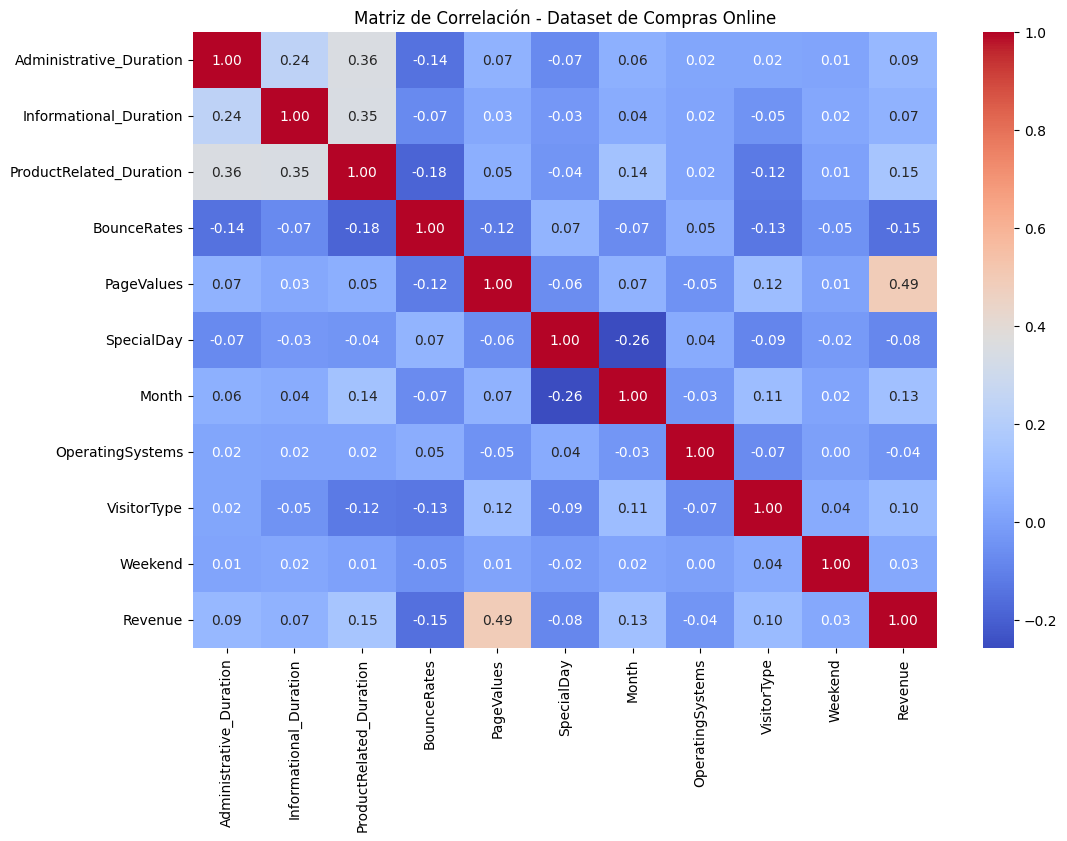

In [275]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Dataset de Compras Online")
plt.show()

In [250]:
corr_with_target = df.corr()['Revenue'].sort_values(ascending=False)
print("Correlación con la variable Revenue:")
print(corr_with_target.to_frame())

Correlación con la variable Revenue:
                          Revenue
Revenue                  1.000000
PageValues               0.492569
ProductRelated           0.158538
ProductRelated_Duration  0.152373
Administrative           0.138917
Month                    0.127372
VisitorType              0.103843
Informational            0.095200
Administrative_Duration  0.093587
Informational_Duration   0.070345
Weekend                  0.029295
Browser                  0.011932
Region                  -0.011595
TrafficType             -0.023640
OperatingSystems        -0.039447
SpecialDay              -0.082305
BounceRates             -0.150673
ExitRates               -0.207071


Browser, TrafficType, Region y OperatingSystems

Vamos a probar optimizarlo con random Forest

In [280]:
set_d = df
X = set_d.drop(columns='Revenue')
y = set_d['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Definimos la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# Ejecutamos la búsqueda
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Usamos el mejor modelo para predecir
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluamos el modelo
report = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_proba)

print("Mejores parámetros:", grid_search.best_params_)
print("F1-score:", report["1"]["f1-score"])
print("Precision:", report["1"]["precision"])
print("Recall:", report["1"]["recall"])
print("ROC AUC:", roc_auc)

Mejores parámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
F1-score: 0.6392961876832844
Precision: 0.7266666666666667
Recall: 0.5706806282722513
ROC AUC: 0.9254454281436223



| **F1-score**  | `0.639` | Equilibrio entre precisión y recall (mejoró frente a los anteriores). Muy relevante para el target desbalanceado.   

| **Precision** | `0.727` | De todos los que predijo como compradores, el 72.7% realmente lo eran.    
                                          |
| **Recall**    | `0.571` | Detecta al 57% de los compradores reales. Es decir, mejora la capacidad de captura de compradores.                
  
| **ROC AUC**   | `0.925` | Excelente capacidad de distinguir entre compradores y no compradores. Está por encima de 0.9, lo cual es muy bueno. |


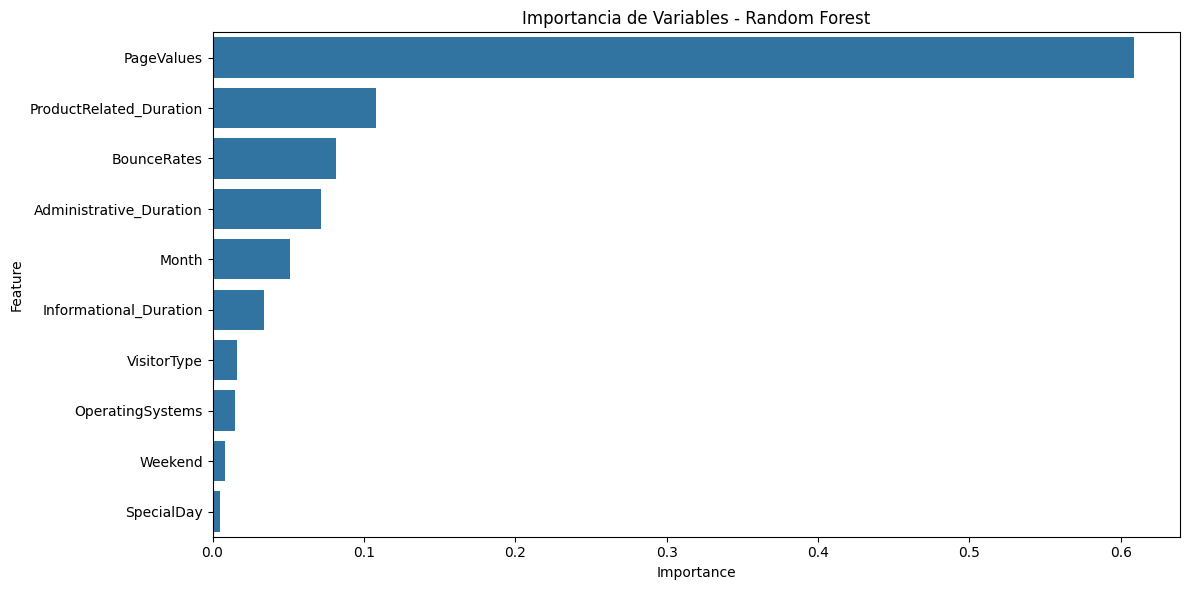

In [283]:
rf_best = RandomForestClassifier(
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)
rf_best.fit(X_train, y_train)
importances = rf_best.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Importancia de Variables - Random Forest")
plt.tight_layout()
plt.show()

### Visualizaciones
histogramas, boxplots, heatmaps

array([[<Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational_Duration'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>],
       [<Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'PageValues'}>,
        <Axes: title={'center': 'SpecialDay'}>],
       [<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'OperatingSystems'}>,
        <Axes: title={'center': 'VisitorType'}>],
       [<Axes: title={'center': 'Weekend'}>,
        <Axes: title={'center': 'Revenue'}>, <Axes: >]], dtype=object)

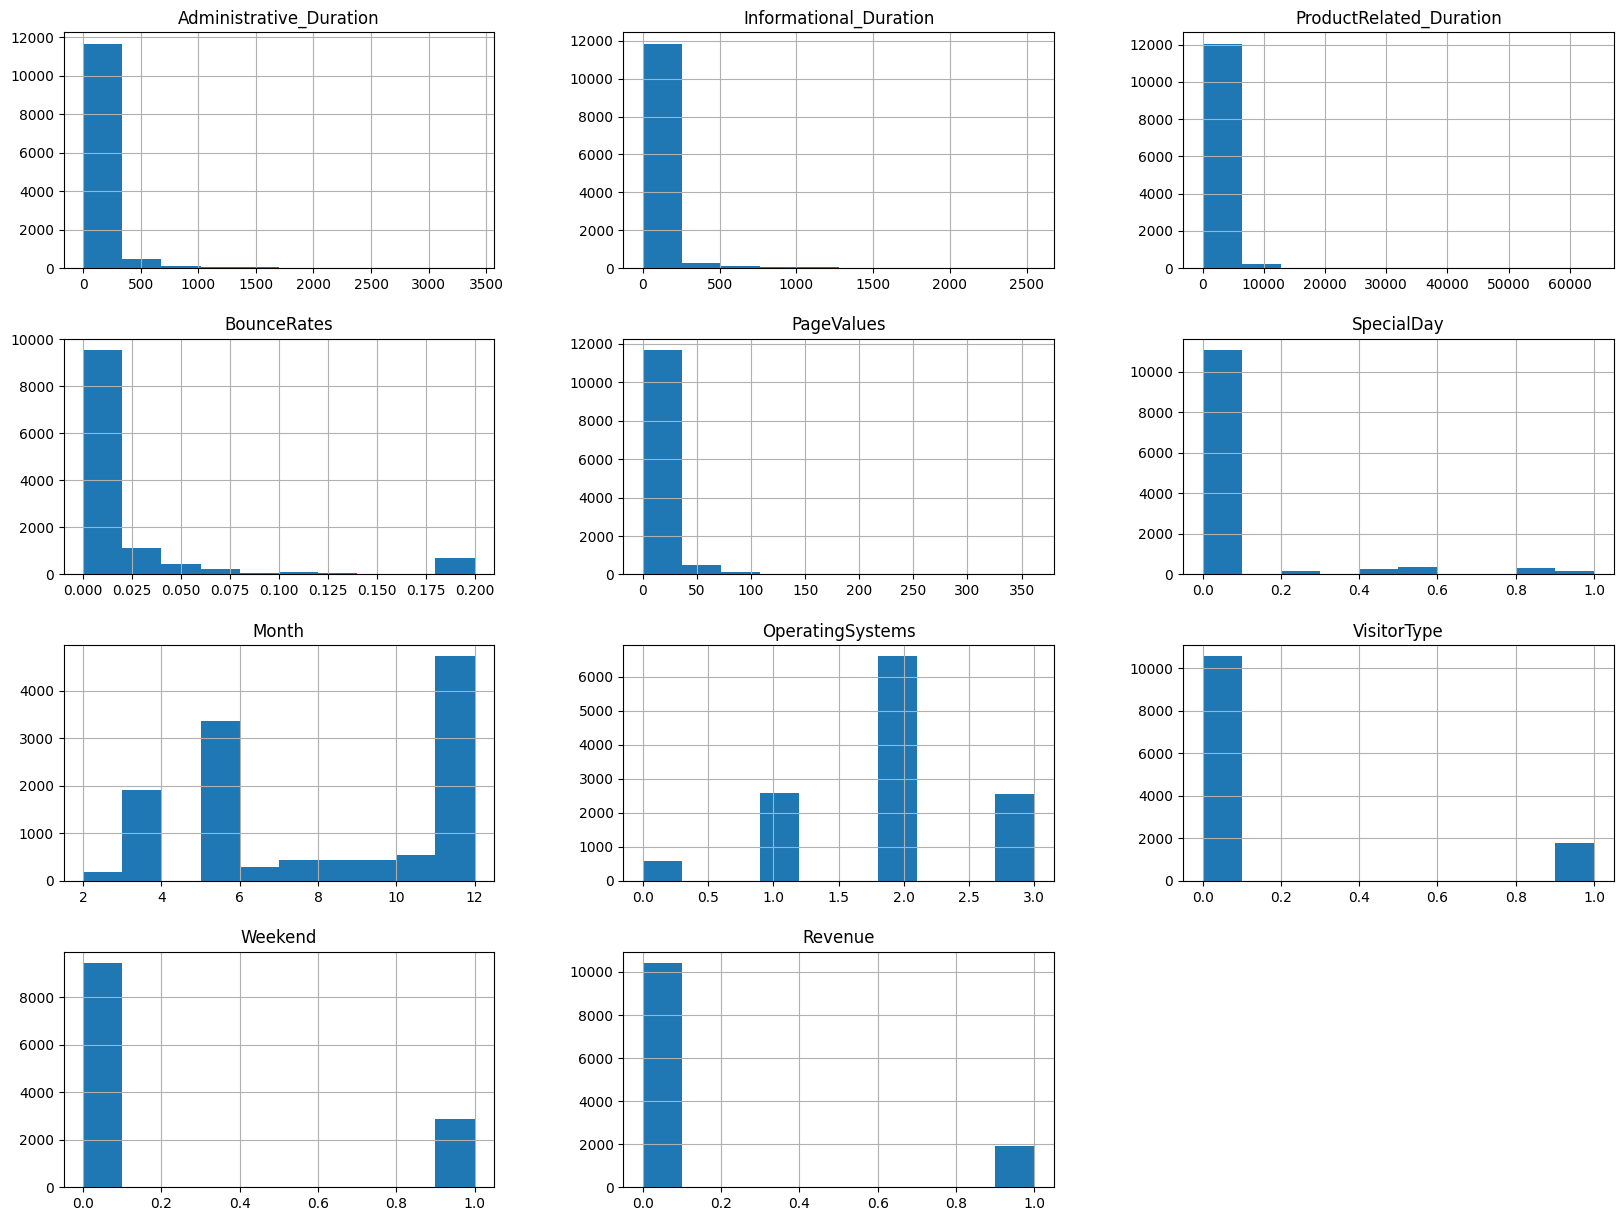

In [176]:
df.hist(figsize=(20,15))